In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


## Identify target variable and inputs

In [4]:
inputs =df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

In [6]:
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


## Convert the columns to numbers
## using the Label Enconder

In [20]:
from sklearn.preprocessing import LabelEncoder 

In [22]:
label_company = LabelEncoder()
label_job = LabelEncoder()
label_degree = LabelEncoder()

In [25]:
inputs['company_n']=label_company.fit_transform(inputs['company'])
inputs['job_n'] =label_job.fit_transform(inputs['job'])
inputs['degree_n'] =label_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [28]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [29]:
from sklearn import tree

In [32]:
model = tree.DecisionTreeClassifier()

## Train Your Model

In [33]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [35]:
model.score(inputs_n,target)

1.0

In [36]:
model.predict([[2,2,1]])

C:\Users\Mr bones\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [37]:
model.predict([[2,0,1]])

C:\Users\Mr bones\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## Support Vector

In [38]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [40]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [41]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [44]:
df =pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [50]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])

In [51]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [52]:
from matplotlib import pyplot as plt

In [53]:
%matplotlib inline

In [54]:
df0 =df[df.target ==0]
df1 =df[df.target ==1]
df2 =df[df.target ==2]

In [57]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


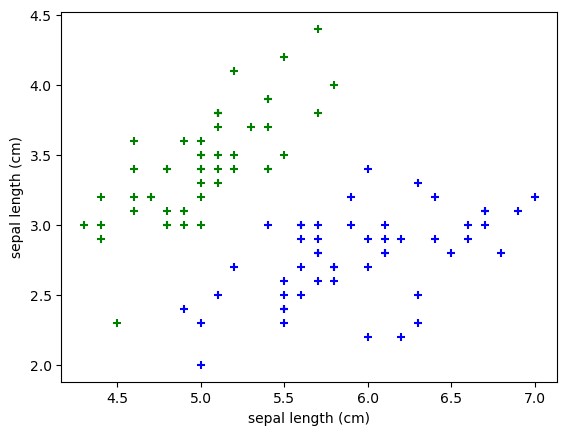

In [65]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal length (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color ='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color ='blue',marker='+')

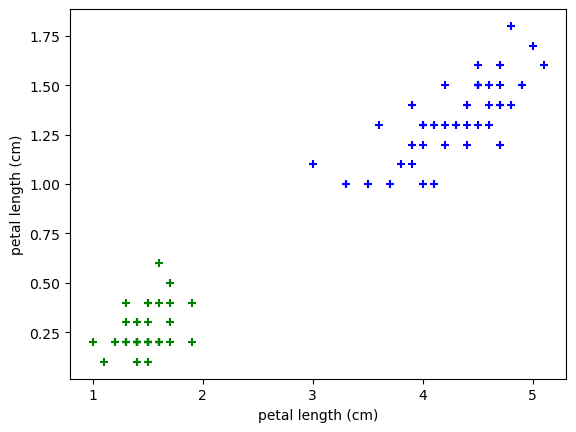

In [66]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal length (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color ='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color ='blue',marker='+')

In [69]:
from sklearn.model_selection import train_test_split

In [73]:
X=df.drop(['target','flower_name'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
y=df.target

In [75]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [76]:
len(X_train)

120

In [77]:
len(X_test)

30

In [83]:
# creating svm classifier
from sklearn.svm import SVC
model = SVC(C=10)

In [84]:
model.fit(X_train,y_train)

SVC(C=10)

In [86]:
model.score(X_test,y_test)

0.9666666666666667

In [95]:
from sklearn.datasets import load_digits

In [100]:
digits=load_digits()

In [101]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [103]:
X= digits.data
y=digits.target

In [112]:
digits.feature_names

## Split your training set

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Create a classifier

In [106]:
from sklearn.svm import SVC

In [113]:
model =SVC()

In [114]:
model.fit(X,y)

SVC()

In [115]:
model.score(X_test,y_test)

0.9888888888888889

## SVM classifier with a radial basis function (rbf) kernel

In [116]:
svm_rbf =SVC(kernel='rbf')

In [117]:
# Train the SVM classifier with the training data
svm_rbf.fit(X_train, y_train)

SVC()

In [118]:
# Make predictions on the test data
y_pred_rbf = svm_rbf.predict(X_test)

In [119]:
# Measure accuracy with the rbf kernel
from sklearn.metrics import accuracy_score
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy with rbf kernel:", accuracy_rbf)

Accuracy with rbf kernel: 0.9777777777777777


## SVM classifier with a linear kernel

In [120]:
svm_linear = SVC(kernel='linear')

In [122]:
# Train the SVM classifier with the training data
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [123]:
# Make predictions on the test data
y_pred_linear = svm_linear.predict(X_test)


### SCORE

In [124]:
# Measure accuracy with the linear kernel
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy with linear kernel:", accuracy_linear)

Accuracy with linear kernel: 0.95


### Tune hyperparameters using GridSearchCV

In [125]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}


In [127]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']})

### Get the best parameters from the grid search

In [129]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_accuracy)

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9937330623306233


### Use the best parameters to create the final SVM classifier

In [130]:
final_svm = SVC(**best_params)

### Train the final SVM classifier with the training data

In [131]:
final_svm.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

### Make predictions on the test data

In [135]:
y_pred_final = final_svm.predict(X_test)

### Measure accuracy with the final model

In [133]:
accuracy_final = accuracy_score(y_test, y_pred_final)
print("Accuracy with tuned model:", accuracy_final)

Accuracy with tuned model: 0.975


# Random Forest Model

In [137]:
# create a dataFrame
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [141]:
# creating a new column
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [147]:
X=df.drop(['target'],axis='columns')
y=g=digits.target

In [142]:
from sklearn.model_selection import train_test_split

In [148]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [149]:
len(X_train)

1437

In [150]:
len(X_test)

360

In [151]:
from  sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

### Tune with n_estimation

In [153]:
model_N_estimators = RandomForestClassifier(n_estimators=10)

In [155]:
## Train Model
model_N_estimators.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

## Score

In [156]:
model_N_estimators.score(X_test,y_test)

0.925

In [157]:
## confusion matrice to test error
y_predicted = model_N_estimators.predict(X_test)

In [160]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 39,  0,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 37,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  2, 43,  0,  3,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 25,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 1,  1,  0,  0,  2,  0, 28,  0,  0,  0],
       [ 1,  0,  0,  0,  2,  0,  0, 36,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  1,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  1, 30]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

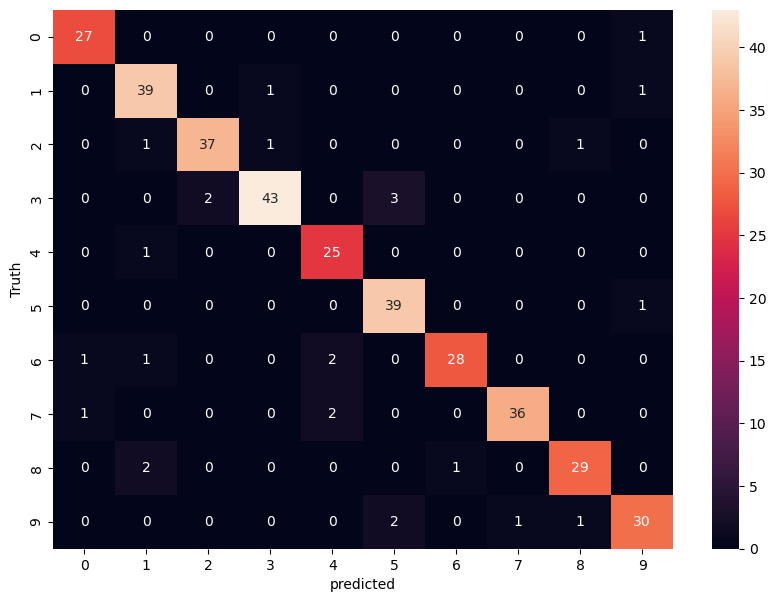

In [164]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

## K fold cross validation

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

In [166]:
digits = load_digits()

## Split dataset for training

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.3)

### Use Different classifiers

In [177]:
lr=LogisticRegression(solver='saga', max_iter=1000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

C:\Users\Mr bones\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9648148148148148

In [178]:
svm =SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9888888888888889

In [179]:
rf =RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9814814814814815

In [190]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [191]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [192]:
def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [205]:
get_score(LogisticRegression(max_iter=1000),X_train,X_test,y_train,y_test)

C:\Users\Mr bones\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9148580968280468

In [194]:
get_score(SVC(),X_train,X_test,y_train,y_test)

0.9888888888888889

In [198]:
from sklearn.model_selection import StratifiedKFold
folds =StratifiedKFold(n_splits=3)
folds

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [214]:
score_l=[]
score_svm=[]
score_rf=[]

for train_index, test_index in kf.split(digits.data):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    score_l.append(get_score(LogisticRegression(solver='saga', max_iter=1000), X_train, X_test, y_train, y_test))
    score_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    score_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

C:\Users\Mr bones\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [215]:
score_l

[0.9265442404006677, 0.9432387312186978, 0.9148580968280468]

In [216]:
score_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [217]:
score_rf

[0.9499165275459098, 0.9549248747913188, 0.9215358931552587]

In [218]:
from sklearn.model_selection import cross_val_score 

In [221]:
cross_val_score(LogisticRegression(solver='saga', max_iter=1000),digits.data,digits.target)

C:\Users\Mr bones\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mr bones\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mr bones\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0.92222222, 0.86944444, 0.94707521, 0.93871866, 0.89972145])

In [222]:
cross_val_score(SVC(),digits.data,digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [223]:
cross_val_score(RandomForestClassifier(),digits.data,digits.target)

array([0.93333333, 0.91666667, 0.95821727, 0.9637883 , 0.92479109])